In [1]:
%matplotlib inline
%pip install statsmodels

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import os
from scipy.stats import zscore
from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from scipy.stats import kruskal

import warnings

warnings.filterwarnings('ignore', category=UserWarning)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
%pip install pandas-summary

# 파일들이 있는 폴더 경로
folder_path = 'C:/Users/mumu1/Desktop/project_movie_data/project_dataset'

# 파일 이름을 변수에 할당
o_df_customers = pd.read_csv(os.path.join(folder_path, 'olist_customers_dataset.csv'), encoding='ISO-8859-1')
o_df_geolocation = pd.read_csv(os.path.join(folder_path, 'olist_geolocation_dataset.csv'), encoding='ISO-8859-1')
o_df_order_items = pd.read_csv(os.path.join(folder_path, 'olist_order_items_dataset.csv'), encoding='ISO-8859-1')
o_df_order_payments = pd.read_csv(os.path.join(folder_path, 'olist_order_payments_dataset.csv'), encoding='ISO-8859-1')
o_df_order_reviews = pd.read_csv(os.path.join(folder_path, 'olist_order_reviews_dataset.csv'), encoding='ISO-8859-1')
o_df_products = pd.read_csv(os.path.join(folder_path, 'olist_products_dataset.csv'), encoding='ISO-8859-1')
o_df_sellers = pd.read_csv(os.path.join(folder_path, 'olist_sellers_dataset.csv'), encoding='ISO-8859-1')
o_df_product_category_name_translation = pd.read_csv(os.path.join(folder_path, 'product_category_name_translation.csv'), encoding='utf-8-sig')


print("✅ 모든 파일이 개별적으로 메모리에 로드되었습니다.")

# 카피본 생성
df_customers = o_df_customers.copy()
df_geolocation = o_df_geolocation.copy()
df_order_items = o_df_order_items.copy()
df_order_payments = o_df_order_payments.copy()
df_order_reviews = o_df_order_reviews.copy()
df_products = o_df_products.copy()
df_sellers = o_df_sellers.copy()
df_product_category_name_translation = o_df_product_category_name_translation.copy()


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
✅ 모든 파일이 개별적으로 메모리에 로드되었습니다.


In [3]:
# 8개 데이터프레임의 결측값 분석
def check_missing(dfs, df_names):
    for df, name in zip(dfs, df_names):
        print(f"\n📊 {name} 데이터프레임 결측값 분석")
        
        missing_info = df.isnull().sum()
        m_pct = (missing_info / len(df)) * 100
        
        if missing_info.sum() == 0:
            print("✅ 결측값 없음. 완전")
        else:
            print("⚠️ 결측치 존재")
            missing_sum = pd.DataFrame({
                '결측수': missing_info,
                '결측율(%)': m_pct,
            }).round(2)
            missing_sum = missing_sum[missing_sum['결측수'] > 0]
            display(missing_sum)

# 사용 예시
original_dfs = [ 
    o_df_customers, o_df_geolocation, o_df_order_items,
    o_df_order_payments, o_df_order_reviews, o_df_products,
    o_df_sellers, o_df_product_category_name_translation,
]

df_names = [
    "customers", "geolocation", "order_items",
    "order_payments", "order_reviews", "products",
    "sellers", "product_category_name_translation",
]

check_missing(original_dfs, df_names)


📊 customers 데이터프레임 결측값 분석
✅ 결측값 없음. 완전

📊 geolocation 데이터프레임 결측값 분석
✅ 결측값 없음. 완전

📊 order_items 데이터프레임 결측값 분석
✅ 결측값 없음. 완전

📊 order_payments 데이터프레임 결측값 분석
✅ 결측값 없음. 완전

📊 order_reviews 데이터프레임 결측값 분석
⚠️ 결측치 존재


,결측수,결측율(%)
review_comment_title,87656,88.34
review_comment_message,58247,58.70



📊 products 데이터프레임 결측값 분석
⚠️ 결측치 존재


,결측수,결측율(%)
product_category_name,610,1.85
product_name_lenght,610,1.85
product_description_lenght,610,1.85
product_photos_qty,610,1.85
product_weight_g,2,0.01
product_length_cm,2,0.01
product_height_cm,2,0.01
product_width_cm,2,0.01



📊 sellers 데이터프레임 결측값 분석
✅ 결측값 없음. 완전

📊 product_category_name_translation 데이터프레임 결측값 분석
✅ 결측값 없음. 완전


# 전처리

In [ ]:
# df_products 

# 결측치: 삭제
# 이상치: 음수 없음, 0 삭제

# df_products.info() # 32951

# 결측치가 있는 모든 행 삭제
df_products = df_products.dropna()

# 결측치 삭제 후 DataFrame 출력
print("결측치 삭제 후 DataFrame:")
print(df_products.info())
print("-" * 30)

# 결측치 삭제 후 결측치 수 확인
print("결측치 삭제 후 결측치 개수:")
print(df_products.isnull().sum())

# df_products.describe()

# 마이너스 값 없음
# 0값을 확인할 열 목록
zero_check_columns = [
    'product_name_lenght',
    'product_description_lenght',
    'product_photos_qty',
    'product_weight_g',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm'
]

# 각 열의 0값 비율 계산
zero_ratios = (df_products[zero_check_columns] == 0).mean() * 100

print("각 열의 0값 비율 (%):")
print(zero_ratios)

# 'product_weight_g' 열의 0값을 갖는 행을 삭제
df_products_cleaned = df_products[df_products['product_weight_g'] != 0]

# 'product_weight_g' 열에서 0이 모두 삭제되었는지 확인
print("'product_weight_g' 열의 0값 개수:")
print((df_products_cleaned['product_weight_g'] == 0).sum())

'product_weight_g' 열의 0값 개수:
0


In [5]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [35]:
# 이상치 탐지 
df_order_items.describe() # 음수 없음

# 0값 탐지
df_combined_outliers = df_order_items[(df_order_items['price'] == 0) | (df_order_items['freight_value'] == 0)]
print(len(df_combined_outliers))

# 결측률 확인
zero_rate = (df_order_items[['price','freight_value']] == 0).mean()
print(zero_rate)

# 0인 값 삭제
df_order_items = df_order_items[(df_order_items['price'] != 0) & (df_order_items['freight_value'] != 0)]

# 0이 모두 삭제되었는지 확인
print("df_order_items 0값 개수:")
print((df_order_items['freight_value'] == 0).sum())

0
price            0.0
freight_value    0.0
dtype: float64
df_order_items 0값 개수:
0


전체 데이터 행 수: 112,650
IsolationForest 모델이 탐지한 이상치 개수: 1,127
이상치 비율: 1.00%


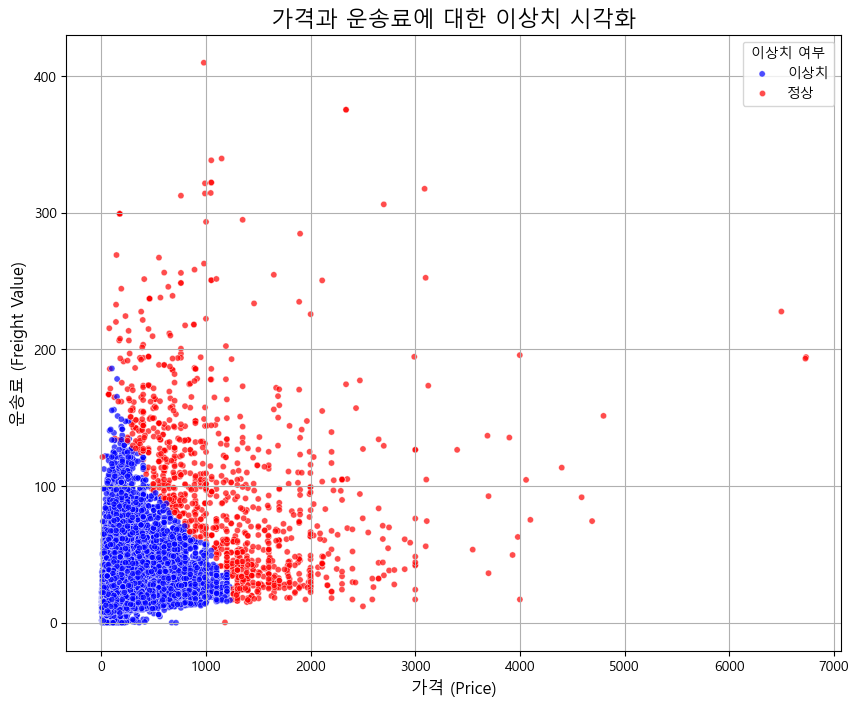

=== 'price' 컬럼 이상치 처리 후 통계량 ===
count    112650.000000
mean        115.296942
std         136.362223
min           9.990000
25%          39.900000
50%          74.990000
75%         134.900000
max         890.000000
Name: price, dtype: float64

=== 'freight_value' 컬럼 이상치 처리 후 통계량 ===
count    112650.000000
mean         19.638178
std          12.816924
min           4.419800
25%          13.080000
50%          16.260000
75%          21.150000
max          84.520000
Name: freight_value, dtype: float64


In [7]:
# df_order_items 이상치 탐지
from sklearn.ensemble import IsolationForest

# 모델 초기화 (contamination은 이상치 비율을 가정)
model = IsolationForest(contamination=0.01) # 1%의 이상치가 있다고 가정

# 모델 학습 및 이상치 예측 (-1은 이상치, 1은 정상 데이터)
df_order_items['outlier_flag'] = model.fit_predict(df_order_items[['price', 'freight_value']])

# 이상치 개수 계산
outlier_count = df_order_items[df_order_items['outlier_flag'] == -1].shape[0]

# f-string을 사용해 결과 출력
print(f"전체 데이터 행 수: {len(df_order_items):,}")
print(f"IsolationForest 모델이 탐지한 이상치 개수: {outlier_count:,}")
print(f"이상치 비율: {(outlier_count / len(df_order_items)):.2%}")

# 이상치 시각화: 산점도 그리기
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='price', 
    y='freight_value', 
    data=df_order_items, 
    hue='outlier_flag', 
    palette=['red', 'blue'], 
    s=20,
    alpha=0.7
)

plt.title('가격과 운송료에 대한 이상치 시각화', fontsize=16)
plt.xlabel('가격 (Price)', fontsize=12)
plt.ylabel('운송료 (Freight Value)', fontsize=12)
plt.legend(title='이상치 여부', labels=['이상치', '정상'])
plt.grid(True)
plt.show()

# 실제 비즈니스적 맥락에서의 해석:
# 가격과 운송료가 모두 극단적으로 낮은 상품은 샘플, 이벤트용 상품, 또는 데이터 입력 오류일 가능성이 있습니다.
# 이상치는 값 대체해서 처리

# 이상치 대체 함수
def winsorize_outliers(df, column_name):
    """
    1%와 99% 백분위수 값을 기준으로 이상치를 대체합니다.
    """
    lower_bound = df[column_name].quantile(0.01)
    upper_bound = df[column_name].quantile(0.99)
    
    # 1%보다 작은 값을 1% 값으로, 99%보다 큰 값을 99% 값으로 대체
    df[column_name] = np.where(df[column_name] < lower_bound, lower_bound, df[column_name])
    df[column_name] = np.where(df[column_name] > upper_bound, upper_bound, df[column_name])
    return df

# 'price'와 'freight_value' 컬럼의 이상치 대체
df_order_items = winsorize_outliers(df_order_items.copy(), 'price')
df_order_items = winsorize_outliers(df_order_items.copy(), 'freight_value')

# 이상치 처리 후의 데이터 통계량 확인
print("=== 'price' 컬럼 이상치 처리 후 통계량 ===")
print(df_order_items['price'].describe())
print("\n=== 'freight_value' 컬럼 이상치 처리 후 통계량 ===")
print(df_order_items['freight_value'].describe())


In [8]:
'''
df_review 

1. 데이터 상황 요약
review_comment_title: 결측치 88% → 고객 대부분이 제목은 아예 작성하지 않음.
review_comment_message: 결측치 59% → 절반 이상이 코멘트를 남기지 않음.
review_score (별점): 결측치 없음 (모든 리뷰는 점수 필수).
'''

# --- 리뷰 메시지 작성 여부 플래그 생성 ---
df_order_reviews["has_comment"] = df_order_reviews["review_comment_message"].notnull().astype(int)

# --- 리뷰 제목/메시지 결측치 "No Comment"로 치환 ---
df_order_reviews["review_comment_title"] = df_order_reviews["review_comment_title"].fillna("No Comment")
df_order_reviews["review_comment_message"] = df_order_reviews["review_comment_message"].fillna("No Comment")

# 확인
print(df_order_reviews[["review_score", "has_comment", "review_comment_title", "review_comment_message"]].head())
print("\n📌 has_comment 분포")
print(df_order_reviews["has_comment"].value_counts(normalize=True).round(3) * 100)


   review_score  has_comment review_comment_title  \
0             4            0           No Comment   
1             5            0           No Comment   
2             5            0           No Comment   
3             5            1           No Comment   
4             5            1           No Comment   

                              review_comment_message  
0                                         No Comment  
1                                         No Comment  
2                                         No Comment  
3              Recebi bem antes do prazo estipulado.  
4  ParabÃ©ns lojas lannister adorei comprar pela ...  

📌 has_comment 분포
has_comment
0    58.7
1    41.3
Name: proportion, dtype: float64


In [43]:
# orders 파일 읽어오기
file_path_absolute ='C:/Users/mumu1/Desktop/project_movie_data/project_dataset/olist_orders_dataset.csv'
o_df_order = pd.read_csv(file_path_absolute, encoding='ISO-8859-1')

df_order = o_df_order.copy()

# orders 데이터 탐색 : 누락, 중복, 이상 확인, 결측치 확인
o_df_order.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
# df_order 결측치 처리: 결측률 낮음 결측치 제거

# 결측치 제거 전
print("결측치 제거 전 df_order의 정보:")
print(df_order.info())
print("\n" + "="*30 + "\n")

# 결측치를 제거할 컬럼 리스트 정의
missing_value_cols = ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']

# 5% 이하 3개 컬럼의 결측치 제거
# dropna 함수를 한 번만 호출하여 모든 작업을 처리합니다.
# how='any'는 지정된 컬럼(subset) 중 하나라도 결측치인 행을 삭제하라는 의미입니다.
# inplace=False(기본값)이므로 새로운 데이터프레임이 반환됩니다.
df_order = df_order.dropna(subset=missing_value_cols)

print("결측치 제거 후 df_order의 정보:")
print(df_order.info())
print("\n" + "="*30 + "\n")

# 결측치 제거 후 각 열의 결측치 수 확인
print("결측치 제거 후 각 열의 결측치 수:")
print(df_order.isnull().sum())

결측치 제거 전 df_order의 정보:
<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96461 non-null  object
 1   customer_id                    96461 non-null  object
 2   order_status                   96461 non-null  object
 3   order_purchase_timestamp       96461 non-null  object
 4   order_approved_at              96461 non-null  object
 5   order_delivered_carrier_date   96461 non-null  object
 6   order_delivered_customer_date  96461 non-null  object
 7   order_estimated_delivery_date  96461 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB
None


결측치 제거 후 df_order의 정보:
<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  

In [11]:
# 이상치 탐지: 계산한 배송시간 차이가 크거나 작은 경우
print('\n=== 이상값 확인 ===')

# 데이터 타입 변환
df_order["order_approved_at"] = pd.to_datetime(df_order["order_approved_at"])
df_order["order_purchase_timestamp"] = pd.to_datetime(df_order["order_purchase_timestamp"])
df_order["order_delivered_carrier_date"] = pd.to_datetime(df_order["order_delivered_carrier_date"])
df_order["order_delivered_customer_date"] = pd.to_datetime(df_order["order_delivered_customer_date"])
df_order["order_purchase_timestamp"] = pd.to_datetime(df_order["order_purchase_timestamp"])
df_order["order_estimated_delivery_date"] = pd.to_datetime(df_order["order_estimated_delivery_date"])

# 시간 차이 계산 (일 단위)
# 결제까지 걸린 시간: 주문승인일 - 결제일
df_order["purchase_to_approved"] = (df_order["order_approved_at"] - df_order["order_purchase_timestamp"]).dt.total_seconds()/86400
# 주문-배송 걸린 시간: 배송완료일 - 주문승인일
df_order["approved_to_carrier"] = (df_order["order_delivered_carrier_date"] - df_order["order_approved_at"]).dt.total_seconds()/86400
# 택배사-배송 걸린 시간: 배송완료일 - 택배사 전달일
df_order["carrier_to_customer"] = (df_order["order_delivered_customer_date"] - df_order["order_delivered_carrier_date"]).dt.total_seconds()/86400
# 계산-배송 걸린 시간: - 배송완료일 - 주문계산일
df_order["purchase_to_customer"] = (df_order["order_delivered_customer_date"] - df_order["order_purchase_timestamp"]).dt.total_seconds()/86400

# 모든 시간 계산 컬럼에서 음수 값만 찾기
# 시간 계산 컬럼 리스트
time_cols = ["purchase_to_approved","approved_to_carrier","carrier_to_customer","purchase_to_customer"]

# 각 컬럼별 음수 개수 계산
neg_counts = {col: (df_order[col] < 0).sum() for col in time_cols}

# 전체 음수 개수 (한 행이라도 음수인 경우)
total_neg = df_order[(df_order[time_cols] < 0).any(axis=1)].shape[0]

# 결과 출력
print("컬럼별 음수 개수:", neg_counts)
print("전체 음수 개수 (한 행이라도 음수):", total_neg)


=== 이상값 확인 ===
컬럼별 음수 개수: {'purchase_to_approved': np.int64(0), 'approved_to_carrier': np.int64(1350), 'carrier_to_customer': np.int64(23), 'purchase_to_customer': np.int64(0)}
전체 음수 개수 (한 행이라도 음수): 1373


1) 데이터 무결성 & 계산값 검증

이미 계산해둔 4개 지표가 맞는지 **허용 오차(±1초=1/86400일)**로 교차검증합니다.
또한 음수/이상치, delivered 이외 상태 존재 여부를 점검합니다.

In [12]:
# 1-1. datetime dtype 보장
datetime_cols = [
    "order_purchase_timestamp", "order_approved_at",
    "order_delivered_carrier_date", "order_delivered_customer_date",
    "order_estimated_delivery_date"
]
for c in datetime_cols:
    assert pd.api.types.is_datetime64_any_dtype(df_order[c]), f"{c}는 datetime 타입이어야 합니다."

# 1-2. 로직 재계산(검증용 임시 컬럼)
EPS = 1/86400  # 1초
calc = pd.DataFrame(index=df_order.index)
calc["purchase_to_approved_chk"] = (df_order["order_approved_at"] - df_order["order_purchase_timestamp"]).dt.total_seconds()/86400
calc["approved_to_carrier_chk"]  = (df_order["order_delivered_carrier_date"] - df_order["order_approved_at"]).dt.total_seconds()/86400
calc["carrier_to_customer_chk"]  = (df_order["order_delivered_customer_date"] - df_order["order_delivered_carrier_date"]).dt.total_seconds()/86400
calc["purchase_to_customer_chk"] = (df_order["order_delivered_customer_date"] - df_order["order_purchase_timestamp"]).dt.total_seconds()/86400

# 1-3. 기존 값과 일치 여부 확인
diffs = {
    "purchase_to_approved": (df_order["purchase_to_approved"] - calc["purchase_to_approved_chk"]).abs().max(),
    "approved_to_carrier": (df_order["approved_to_carrier"] - calc["approved_to_carrier_chk"]).abs().max(),
    "carrier_to_customer": (df_order["carrier_to_customer"] - calc["carrier_to_customer_chk"]).abs().max(),
    "purchase_to_customer": (df_order["purchase_to_customer"] - calc["purchase_to_customer_chk"]).abs().max(),
}
print("[검증] 최대 절대 오차(일):", diffs)
for k,v in diffs.items():
    assert v <= EPS, f"{k} 계산값이 사전 계산과 불일치 (max abs diff={v}일)"

# 1-4. 상태값 점검
status_counts = df_order["order_status"].value_counts(dropna=False)
print("\n[상태 분포]\n", status_counts)

# 1-5. delivered 필터 (상황에 따라 전체 vs delivered 별도 분석 가능)
df_deliv = df_order[df_order["order_status"]=="delivered"].copy()
print(f"\n[delivered 개수] {len(df_deliv):,} / 전체 {len(df_order):,}")

# 1-6. 음수/이상치 점검 (시간은 음수가 아니어야 정상)
duration_cols = ["purchase_to_approved","approved_to_carrier","carrier_to_customer","purchase_to_customer"]
neg_mask = (df_deliv[duration_cols] < -EPS).any(axis=1)
if neg_mask.any():
    print("\n[경고] 음수 시간 발견 (샘플 5개):\n", df_deliv.loc[neg_mask, ["order_id"]+duration_cols].head())
    # 필요 시 제외
    # df_deliv = df_deliv.loc[~neg_mask].copy()

# 1-7. 비현실적 장기 값(상위 0.5% 이상치) 확인
hi_thresh = df_deliv["purchase_to_customer"].quantile(0.995)
print(f"\n[알림] purchase_to_customer 상위 0.5% 컷오프: {hi_thresh:.2f}일 (참고용)")

# 'purchase_to_customer' 값이 26.73일보다 큰 이상치 데이터 필터링 후 제거
df_deliv_cleaned = df_deliv[df_deliv['purchase_to_customer'] <= 26.73]

# 이상치 제거 후 데이터 크기 확인
print(f"이상치 제거 전 행 수: {len(df_deliv):,}")
print(f"이상치 제거 후 행 수: {len(df_deliv_cleaned):,}")


[검증] 최대 절대 오차(일): {'purchase_to_approved': np.float64(0.0), 'approved_to_carrier': np.float64(0.0), 'carrier_to_customer': np.float64(0.0), 'purchase_to_customer': np.float64(0.0)}

[상태 분포]
 order_status
delivered    96455
canceled         6
Name: count, dtype: int64

[delivered 개수] 96,455 / 전체 96,461

[경고] 음수 시간 발견 (샘플 5개):
                              order_id  purchase_to_approved  \
15   dcb36b511fcac050b97cd5c05de84dc3              5.185995   
64   688052146432ef8253587b930b01a06d              2.400799   
199  58d4c4747ee059eeeb865b349b41f53a              5.446076   
210  412fccb2b44a99b36714bca3fef8ad7b              0.584583   
415  56a4ac10a4a8f2ba7693523bb439eede              5.434977   

     approved_to_carrier  carrier_to_customer  purchase_to_customer  
15             -1.359051            10.028148             13.855093  
64             -0.962593             1.008843              2.447049  
199            -2.440891             1.459248              4.464433  
210          

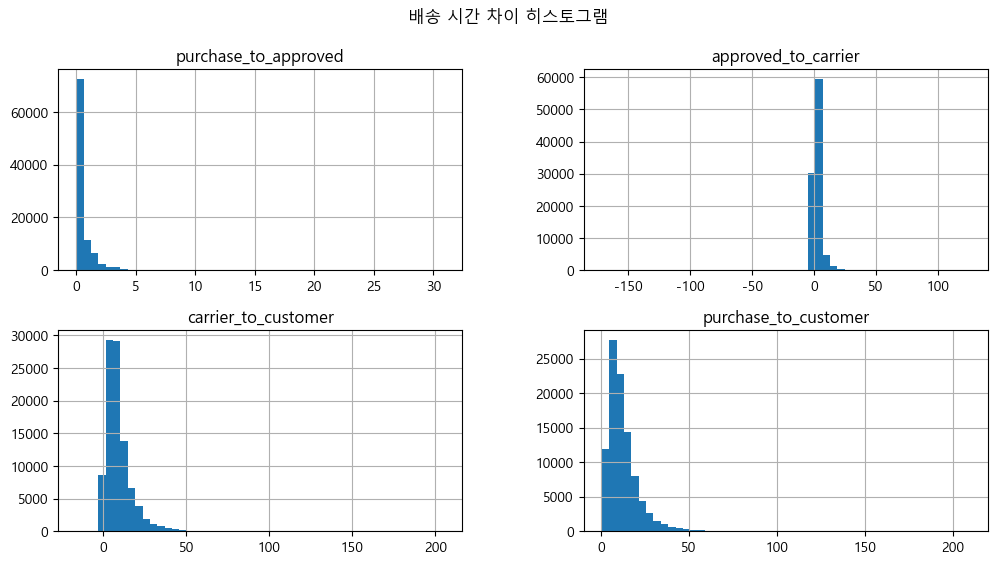

=== Z-score 기준 이상치 비율 (|Z|>3) ===
purchase_to_approved: 2.26%
approved_to_carrier: 1.92%
carrier_to_customer: 1.64%
purchase_to_customer: 1.63%

=== IQR 기준 이상치 비율 ===
purchase_to_approved: 9.26%
approved_to_carrier: 5.80%
carrier_to_customer: 5.26%
purchase_to_customer: 5.08%


In [13]:
# df_order 이상치 탐지 시각화

# 1️⃣ 히스토그램 시각화
df_order[time_cols].hist(bins=50, figsize=(12,6))
plt.suptitle("배송 시간 차이 히스토그램")
plt.show()

# 2️⃣ 극단치 비율 계산
print("=== Z-score 기준 이상치 비율 (|Z|>3) ===")
for col in time_cols:
    z = zscore(df_order[col].dropna())
    outlier_ratio = (abs(z) > 3).mean() * 100
    print(f"{col}: {outlier_ratio:.2f}%")

# 3️⃣ IQR 기반 이상치 비율 계산
print("\n=== IQR 기준 이상치 비율 ===")
for col in time_cols:
    data = df_order[col].dropna()
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    iqr_outlier_ratio = ((data < lower_bound) | (data > upper_bound)).mean() * 100
    print(f"{col}: {iqr_outlier_ratio:.2f}%")

In [14]:
# --- 이상치 플래그 추가 ---
df_order["is_outlier"] = (df_order[time_cols] < 0).any(axis=1)

# 이상치 개수 확인
print("이상치 건수:", df_order["is_outlier"].sum())

# 이상치 제외한 데이터프레임 생성
df_order_clean = df_order[~df_order["is_outlier"]].copy()

print("정제 후 데이터 크기:", df_order_clean.shape)


이상치 건수: 1373
정제 후 데이터 크기: (95088, 13)


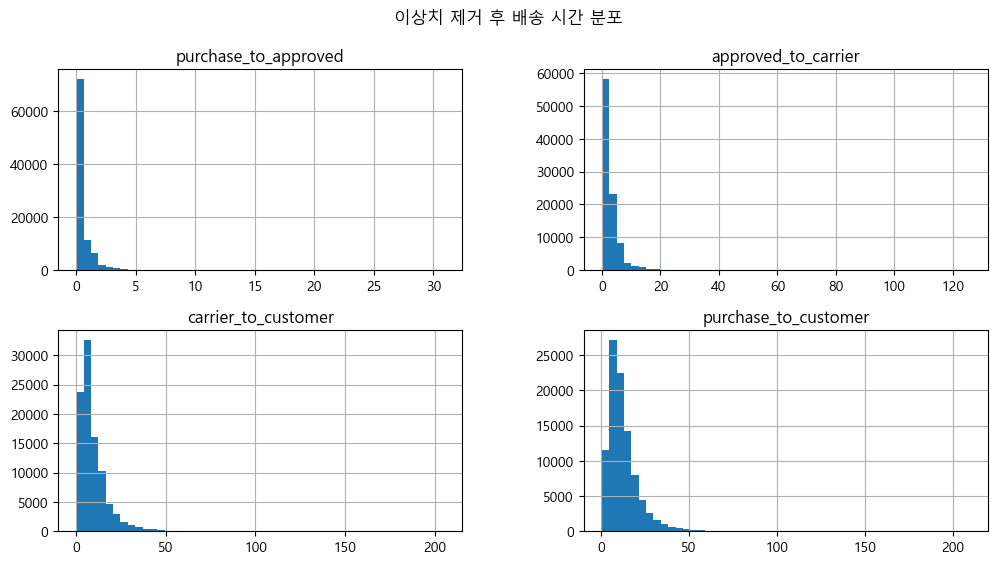

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_to_approved,approved_to_carrier,carrier_to_customer,purchase_to_customer
count,95088,95088,95088,95088,95088,95088.000000,95088.000000,95088.000000,95088.000000
mean,2017-12-31 02:58:13.884559616,2017-12-31 12:37:15.921357056,2018-01-03 09:04:07.208028416,2018-01-12 17:48:48.140701184,2018-01-23 20:52:29.318526208,0.402107,2.851982,9.364363,12.618452
min,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,0.000000,0.000174,0.000000,0.533414
25%,2017-09-12 21:57:03,2017-09-13 11:25:10.500000,2017-09-15 15:44:43.750000128,2017-09-23 16:06:47.500000,2017-10-04 00:00:00,0.008935,0.900521,4.111019,6.811930
50%,2018-01-18 02:13:42,2018-01-18 12:33:28,2018-01-22 21:30:37,2018-01-31 19:22:15,2018-02-14 00:00:00,0.014074,1.848883,7.110324,10.271175
75%,2018-05-03 18:47:43.249999872,2018-05-04 03:31:33,2018-05-07 14:19:00,2018-05-14 19:48:40.249999872,2018-05-25 00:00:00,0.564190,3.616461,12.057983,15.808166
max,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,30.893484,125.762569,205.190972,209.628611
std,NaN,NaN,NaN,NaN,NaN,0.796515,3.483396,8.769619,9.572024


In [15]:
# df_order_clean
# 이상치 제거 후 배송 시간 분포 확인
df_order_clean[time_cols].hist(bins=50, figsize=(12,6))
plt.suptitle("이상치 제거 후 배송 시간 분포")
plt.show()

# 이상치 확인 후 도메인 규칙 기반 제거
df_order_clean = df_order_clean[df_order_clean['approved_to_carrier'] >= 0]
df_order_clean = df_order_clean[df_order_clean['carrier_to_customer'] >= 0]

# 기초 통계 확인
df_order_clean[time_cols].describe()

df_order_clean.describe()
# df_order_clean = df_deliverd_clean


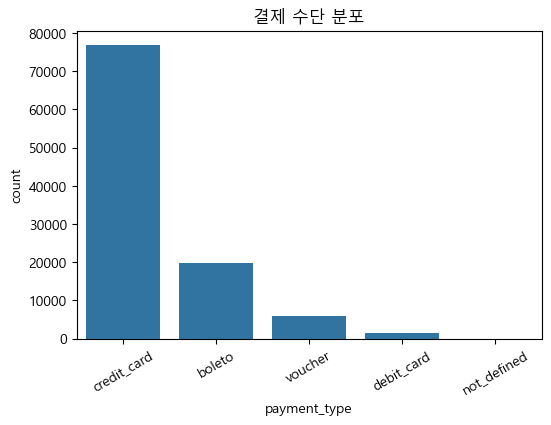


[결제 수단 비율]
payment_type
credit_card    0.739
boleto         0.190
voucher        0.056
debit_card     0.015
not_defined    0.000
Name: proportion, dtype: float64


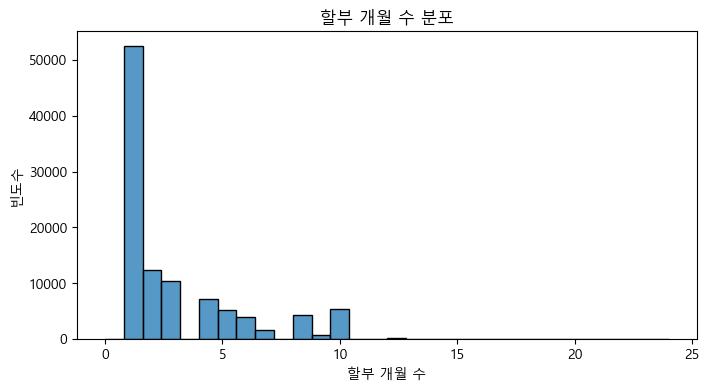


[할부 개월 수 통계]
count    103886.000000
mean          2.853349
std           2.687051
min           0.000000
25%           1.000000
50%           1.000000
75%           4.000000
max          24.000000
Name: payment_installments, dtype: float64


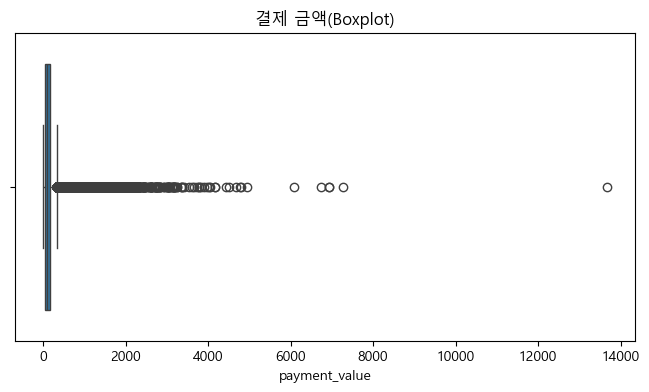

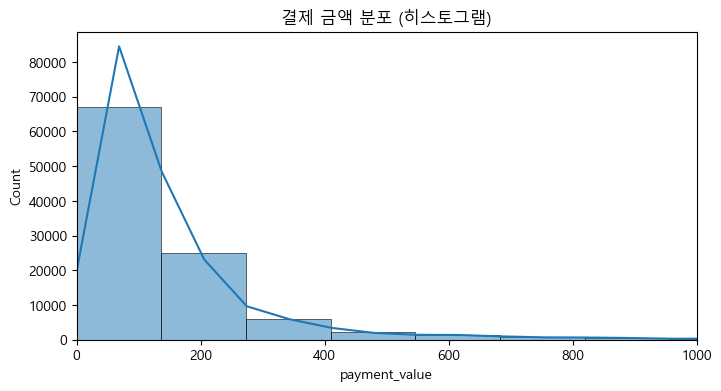


[결제 금액 통계]
count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: payment_value, dtype: float64

[결제 금액 이상치 개수] 7981 / 103886 (7.68%)


' 이상치 간주\npayment_type: 0, 음수, not_defined 제거\npayment_installments (할부 개월 수): 0(일시불)/ 음수, 24개월 초과 제거\npayment_value: 0(일시불), / 음수, Q1, Q3 기반 IQR로 극단치 검출 -> Winsorization (상한 절단)\n\n평균(Mean) = 154.1 → 극단값(고액 결제)의 영향으로 평균이 중앙값보다 큼\n최댓값 = 13,664.08 → 단 1건 정도의 초고액 결제 (전체 분포와 매우 동떨어짐)\nIQR 이상치 비율 ≈ 7.7% (7,981건) → 전체 결제의 약 8%가 극단값\n'

In [16]:
# df_order_payments: 결측X, 이상치 탐지

# 1. payment_type 분포 확인
plt.figure(figsize=(6,4))
sns.countplot(data=o_df_order_payments, x='payment_type', order=o_df_order_payments['payment_type'].value_counts().index)
plt.title("결제 수단 분포")
plt.xticks(rotation=30)
plt.show()

print("\n[결제 수단 비율]")
print(o_df_order_payments['payment_type'].value_counts(normalize=True).round(3))

# 2. 할부 개월 수 분포
plt.figure(figsize=(8,4))
sns.histplot(o_df_order_payments['payment_installments'], bins=30, kde=False)
plt.title("할부 개월 수 분포")
plt.xlabel("할부 개월 수")
plt.ylabel("빈도수")
plt.show()

print("\n[할부 개월 수 통계]")
print(o_df_order_payments['payment_installments'].describe())

# 3. 결제 금액 분포 (payment_value)
plt.figure(figsize=(8,4))
sns.boxplot(x=o_df_order_payments['payment_value'])
plt.title("결제 금액(Boxplot)")
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(o_df_order_payments['payment_value'], bins=100, kde=True)
plt.title("결제 금액 분포 (히스토그램)")
plt.xlim(0, 1000)  # 고액 결제는 따로 확인하기 위해 일단 1000 이하만 시각화
plt.show()

print("\n[결제 금액 통계]")
print(o_df_order_payments['payment_value'].describe())

# 4. 이상치 건수 확인 (IQR 방식)
Q1 = o_df_order_payments['payment_value'].quantile(0.25)
Q3 = o_df_order_payments['payment_value'].quantile(0.75)
IQR = Q3 - Q1
outlier_mask = (o_df_order_payments['payment_value'] < Q1 - 1.5*IQR) | (o_df_order_payments['payment_value'] > Q3 + 1.5*IQR)

print(f"\n[결제 금액 이상치 개수] {outlier_mask.sum()} / {len(o_df_order_payments)} ({outlier_mask.mean()*100:.2f}%)")

''' 이상치 간주
payment_type: 0, 음수, not_defined 제거
payment_installments (할부 개월 수): 0(일시불)/ 음수, 24개월 초과 제거
payment_value: 0(일시불), / 음수, Q1, Q3 기반 IQR로 극단치 검출 -> Winsorization (상한 절단)

평균(Mean) = 154.1 → 극단값(고액 결제)의 영향으로 평균이 중앙값보다 큼
최댓값 = 13,664.08 → 단 1건 정도의 초고액 결제 (전체 분포와 매우 동떨어짐)
IQR 이상치 비율 ≈ 7.7% (7,981건) → 전체 결제의 약 8%가 극단값
'''


In [17]:
df_order_payments = o_df_order_payments
df_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [18]:
'''
payments 이상치 라벨링 처리 -> 라벨링 df 생성: df_label_payment
installments = 0 → "일시불" 카테고리로 변환.
payment_value = 0 → "0원 결제" (ex. 쿠폰, 무료배송, 취소된 거래 등)으로 별도 라벨링.
'''
# 결제데이터 복사
df_lavel_payments = df_order_payments.copy()

# 일시불 라벨링
df_lavel_payments['installment_label'] = df_lavel_payments['payment_installments'].apply(
    lambda x: '일시불' if x == 0 else '할부'
)

# 결제금액 라벨링
df_lavel_payments['payment_label'] = df_lavel_payments['payment_value'].apply(
    lambda x: '0원결제' if x == 0 else '유료결제'
)

# 분포 확인
print(df_lavel_payments['installment_label'].value_counts())
print(df_lavel_payments['payment_label'].value_counts())

# 이상치로 보이는 데이터 일부 확인
print(df_lavel_payments[df_lavel_payments['payment_value'] == 0].head(10))

installment_label
할부     103884
일시불         2
Name: count, dtype: int64
payment_label
유료결제    103877
0원결제         9
Name: count, dtype: int64
                                order_id  payment_sequential payment_type  \
19922   8bcbe01d44d147f901cd3192671144db                   4      voucher   
36822   fa65dad1b0e818e3ccc5cb0e39231352                  14      voucher   
43744   6ccb433e00daae1283ccc956189c82ae                   4      voucher   
51280   4637ca194b6387e2d538dc89b124b0ee                   1  not_defined   
57411   00b1cb0320190ca0daa2c88b35206009                   1  not_defined   
62674   45ed6e85398a87c253db47c2d9f48216                   3      voucher   
77885   fa65dad1b0e818e3ccc5cb0e39231352                  13      voucher   
94427   c8c528189310eaa44a745b8d9d26908b                   1  not_defined   
100766  b23878b3e8eb4d25a158f57d96331b18                   4      voucher   

        payment_installments  payment_value installment_label payment_label  
19922    

In [19]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


# MERGE
join_order_c = df_order_clean + df_customers + df_payments + df_order_items

In [20]:
'''
MERGE
customer 데이터 탐색: 이상치 처리 안함, 데이터 손실 최소화
customer states 컬럼: SP(상파울루 주), RJ (리우데자네이루 주)
'''
# df_order.info() #77694, 컬럼 12개
# df_customers.info() #99441 컬럼 5개

# 1. 주문 + 고객 정보 데이터 조인 (order_id 기준)
join_order_c= df_order_clean.merge(
    df_customers,
    on='customer_id',
    how='left'   # 주문은 반드시 유지, 고객 정보가 없으면 NaN
)

print(f"Merge 후 레코드 수: {len(join_order_c)}")
print(f"원본 df_order 레코드 수: {len(df_order)}")
print("고유 order_id 개수:", join_order_c['order_id'].nunique())
print("전체 order_id 대비 중복 비율:", 1 - join_order_c['order_id'].nunique() / len(join_order_c))

print("customer_city 결측치 개수:", join_order_c['customer_city'].isnull().sum())
print("customer_city 결측치 비율:", join_order_c['customer_city'].isnull().mean())

print(join_order_c.dtypes)

join_order_c['purchase_to_approved'].head()
print(join_order_c.isnull().sum())

Merge 후 레코드 수: 95088
원본 df_order 레코드 수: 96461
고유 order_id 개수: 95088
전체 order_id 대비 중복 비율: 0.0
customer_city 결측치 개수: 0
customer_city 결측치 비율: 0.0
order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
purchase_to_approved                    float64
approved_to_carrier                     float64
carrier_to_customer                     float64
purchase_to_customer                    float64
is_outlier                                 bool
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
dtype: object
order_id                  

In [21]:
# df_join_order_cp

# 3. 1번 df + df_order_payments_sum 병합
df_join_order_cp= join_order_c.merge(
    df_order_payments,
    on='order_id',
    how='left'
)

# df_join_order_cp.info()
# print(f"Merge 후 레코드 수: {len(df_join_order_cp)}")
# print(f"원본 df_order 레코드 수: {len(df_join_order_cp)}")
# print(df_join_order_cp.isnull().sum())

# 'payment_type' 컬럼에 결측치가 있는 행만 필터링
nan_rows = df_join_order_cp[df_join_order_cp['payment_type'].isnull()]

print("=== 결측치가 있는 행 ===")
print(nan_rows)

# 결측치 개수 다시 확인
print("\n=== 결측치 개수 ===")
print(nan_rows.isnull().sum())

# 'payment_type' 컬럼에 결측치가 있는 행 제거
df_join_order_cp_cleaned = df_join_order_cp.dropna(subset=['payment_type'])

# 삭제 후 데이터프레임의 행 수 확인
print(f"결측치 제거 전 행 수: {len(df_join_order_cp):,}")
print(f"결측치 제거 후 행 수: {len(df_join_order_cp_cleaned):,}")

# 결측치가 제거되었는지 다시 확인
print("\n=== 결측치 제거 후 확인 ===")
print(df_join_order_cp_cleaned.isnull().sum())

=== 결측치가 있는 행 ===
                               order_id                       customer_id  \
30708  bfbd0f9bdef84302105ad712db648a6c  86dc2ffce2dfff336de2f386a786e574   

      order_status order_purchase_timestamp   order_approved_at  \
30708    delivered      2016-09-15 12:16:38 2016-09-15 12:16:38   

      order_delivered_carrier_date order_delivered_customer_date  \
30708          2016-11-07 17:11:53           2016-11-09 07:47:38   

      order_estimated_delivery_date  purchase_to_approved  \
30708                    2016-10-04                   0.0   

       approved_to_carrier  ...  purchase_to_customer  is_outlier  \
30708            53.205035  ...             54.813194       False   

                     customer_unique_id customer_zip_code_prefix  \
30708  830d5b7aaa3b6f1e9ad63703bec97d23                    14600   

              customer_city customer_state payment_sequential  payment_type  \
30708  sao joaquim da barra             SP                NaN           NaN  

In [22]:
# MERGE 3단계: 2번 결과에 아이템 정보 병합
df_join_ocpi = df_join_order_cp.merge(
    df_order_items, 
    on='order_id', 
    how='left'
)

df_join_ocpi.info()
print(f"Merge 후 레코드 수: {len(df_join_ocpi)}")
print(df_join_ocpi.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113371 entries, 0 to 113370
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113371 non-null  object        
 1   customer_id                    113371 non-null  object        
 2   order_status                   113371 non-null  object        
 3   order_purchase_timestamp       113371 non-null  datetime64[ns]
 4   order_approved_at              113371 non-null  datetime64[ns]
 5   order_delivered_carrier_date   113371 non-null  datetime64[ns]
 6   order_delivered_customer_date  113371 non-null  datetime64[ns]
 7   order_estimated_delivery_date  113371 non-null  datetime64[ns]
 8   purchase_to_approved           113371 non-null  float64       
 9   approved_to_carrier            113371 non-null  float64       
 10  carrier_to_customer            113371 non-null  float64       
 11  

In [23]:
'''
과제 1: 고객 세분화 및 RFM 분석
브라질 지역별 고객들의 구매 패턴을 분석하여 RFM(Recency, Frequency, Monetary) 모델을 구축하고,
고객을 세분화하여 각 세그먼트의 특성과 비즈니스 전략을 제시
'''
# ===============================
# 1. RFM 분석용 데이터 준비
# ===============================
# 분석 기준일 (데이터에서 가장 마지막 주문일 + 1일)
analysis_date = df_join_order_cp['order_purchase_timestamp'].max() + pd.Timedelta(days=1)

# 고객별 RFM 집계
rfm = df_join_order_cp.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (analysis_date - x.max()).days,  # Recency
    'order_id': 'nunique',                                                # Frequency (고객별 주문 횟수)
    'payment_value': 'sum'                                               # Monetary (총 결제 금액)
}).reset_index()

rfm.columns = ['customer_id', 'Recency', 'Frequency', 'Monetary']

# ===============================
# 2. RFM 점수화 (1~5등급)
# ===============================
# Recency: 최근일수 낮을수록 좋은 고객 → 낮으면 높은 점수
rfm['R_score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])

# Frequency, Monetary: 값이 높을수록 좋은 고객 → 높으면 높은 점수
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
rfm['M_score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])

# RFM 조합 점수
rfm['RFM_score'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)

# ===============================
# 3. 고객 세그먼트 분류 (예시)
# ===============================
def segment_customer(row):
    if row['R_score'] in ['4','5'] and row['F_score'] in ['4','5']:
        return '우수 고객 (VIP)'
    elif row['R_score'] in ['3','4','5'] and row['F_score'] in ['1','2']:
        return '잠재 충성 고객'
    elif row['R_score'] in ['1','2'] and row['F_score'] in ['4','5']:
        return '이탈 위험 고객'
    elif row['R_score'] in ['1','2'] and row['F_score'] in ['1','2']:
        return '이탈 고객'
    else:
        return '일반 고객'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)

# ===============================
# 4. 지역별 RFM 분석 확장
# ===============================

customer_region = df_join_order_cp[['customer_id', 'customer_city']].drop_duplicates(subset=['customer_id'])

rfm_region = rfm.merge(customer_region, on='customer_id', how='left')

# 지역별 평균 RFM 값
region_summary = rfm_region.groupby('customer_city')[['Recency','Frequency','Monetary']].mean().round(1)

print("=== 지역별 평균 RFM ===")
print(region_summary.head())

# 1. customer_state 컬럼을 포함하여 조인
customer_region = df_join_order_cp[['customer_id', 'customer_city', 'customer_state']].drop_duplicates(subset=['customer_id'])

# 2. RFM 데이터에 지역 정보 병합
rfm_region = rfm.merge(customer_region, on='customer_id', how='left')

# 3. 주(state)별 평균 RFM 값
state_summary = rfm_region.groupby('customer_state')[['Recency','Frequency','Monetary']].mean().round(1)
print("=== 주(State)별 평균 RFM ===")
print(state_summary.head())

# 1. customer_state 컬럼을 포함하여 조인
customer_region = df_join_order_cp[['customer_id', 'customer_city', 'customer_state']].drop_duplicates(subset=['customer_id'])

# 2. RFM 데이터에 지역 정보 병합
rfm_region = rfm.merge(customer_region, on='customer_id', how='left')

# 3. 주(state)별 평균 RFM 값
state_summary = rfm_region.groupby('customer_state')[['Recency','Frequency','Monetary']].mean().round(1)
print("=== 주(State)별 평균 RFM ===")
print(state_summary.head())

# 4. 도시(city)별 평균 RFM 값
city_summary = rfm_region.groupby('customer_city')[['Recency','Frequency','Monetary']].mean().round(1)
print("\n=== 도시(City)별 평균 RFM ===")
print(city_summary.head())

=== 지역별 평균 RFM ===
                     Recency  Frequency  Monetary
customer_city                                    
abadia dos dourados    270.5        1.0     177.6
abadiania              214.0        1.0    1025.5
abaete                 245.9        1.0     163.0
abaetetuba             206.1        1.0     424.8
abaiara                194.5        1.0     166.1
=== 주(State)별 평균 RFM ===
                Recency  Frequency  Monetary
customer_state                              
AC                322.6        1.0     247.4
AL                268.9        1.0     238.0
AM                270.6        1.0     190.9
AP                246.3        1.0     240.9
BA                246.2        1.0     182.1
=== 주(State)별 평균 RFM ===
                Recency  Frequency  Monetary
customer_state                              
AC                322.6        1.0     247.4
AL                268.9        1.0     238.0
AM                270.6        1.0     190.9
AP                246.3        1.0     24

In [24]:
'''
지역별(state, city별) 고객을 세분화하여 세그먼트별 특징
고객등급 별 구매금액
customer_stats['평균장바구니크기'] = customer_stats['총구매량'] / customer_stats['Frequency']
customer_stats['거래당상품종류'] = customer_stats['상품종류수'] / customer_stats['Frequency']
구매 기간 및 주기 계산 (추가하기)
'''

"\n지역별(state, city별) 고객을 세분화하여 세그먼트별 특징\n고객등급 별 구매금액\ncustomer_stats['평균장바구니크기'] = customer_stats['총구매량'] / customer_stats['Frequency']\ncustomer_stats['거래당상품종류'] = customer_stats['상품종류수'] / customer_stats['Frequency']\n구매 기간 및 주기 계산 (추가하기)\n"